In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [14]:
with open('iterative_test.json', 'r') as f:
    iterative_y_list = json.loads(f.read())
with open('random_test.json', 'r') as f:
    random_y_list = json.loads(f.read())
with open('random_roi_test.json', 'r') as f:
    random_roi_y_list = json.loads(f.read())

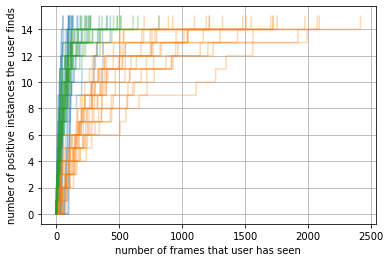

In [15]:
fig, ax = plt.subplots(1)
for plot_data_y in iterative_y_list:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:blue', alpha=0.3)

for plot_data_y in random_y_list:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:orange', alpha=0.3)

for plot_data_y in random_roi_y_list:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:green', alpha=0.3)

ax.set_ylabel('number of positive instances the user finds')
ax.set_xlabel('number of frames that user has seen')
ax.grid()

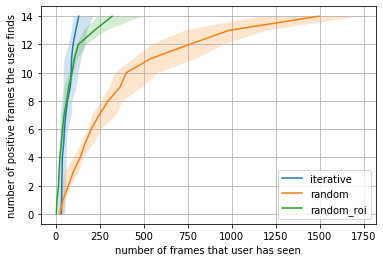

In [16]:
ip_y = []
for plot_data_y in iterative_y_list:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    ip_y.append(num_frames_as_y)
ip_y = np.asarray(ip_y)
ip_y_upper = np.percentile(ip_y, 75, axis=0)
ip_y_lower = np.percentile(ip_y, 25, axis=0)
ip_y_mean = np.percentile(ip_y, 50, axis=0)
ip_x_values = range(ip_y.shape[1])

rp_y = []
for plot_data_y in random_y_list:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    rp_y.append(num_frames_as_y)
rp_y = np.asarray(rp_y)
rp_y_upper = np.percentile(rp_y, 75, axis=0)
rp_y_lower = np.percentile(rp_y, 25, axis=0)
rp_y_mean = np.percentile(rp_y, 50, axis=0)
rp_x_values = range(rp_y.shape[1])

rp_roi_y = []
for plot_data_y in random_roi_y_list:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    rp_roi_y.append(num_frames_as_y)
rp_roi_y = np.asarray(rp_roi_y)
rp_roi_y_upper = np.percentile(rp_roi_y, 75, axis=0)
rp_roi_y_lower = np.percentile(rp_roi_y, 25, axis=0)
rp_roi_y_mean = np.percentile(rp_roi_y, 50, axis=0)
rp_roi_x_values = range(rp_roi_y.shape[1])

# plot it!
fig, ax = plt.subplots(1)
ax.plot(ip_y_mean, ip_x_values, label='iterative', color='tab:blue')
ax.plot(rp_y_mean, rp_x_values, label='random', color='tab:orange')
ax.plot(rp_roi_y_mean, rp_roi_x_values, label='random_roi', color='tab:green')
ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor='tab:blue', alpha=0.2)
ax.fill_betweenx(rp_x_values, rp_y_lower, rp_y_upper, facecolor='tab:orange', alpha=0.2)
ax.fill_betweenx(rp_roi_x_values, rp_roi_y_lower, rp_roi_y_upper, facecolor='tab:green', alpha=0.2)
ax.legend(loc='lower right')
ax.set_xlabel('number of frames that user has seen')
ax.set_ylabel('number of positive frames the user finds')
ax.grid()


In [7]:
with open('iterative_only_neg.json', 'r') as f:
    iterative_y_list_only_neg = json.loads(f.read())
with open('random_only_neg.json', 'r') as f:
    random_y_list_only_neg = json.loads(f.read())
with open('random_roi_only_neg.json', 'r') as f:
    random_roi_y_list_only_neg = json.loads(f.read())

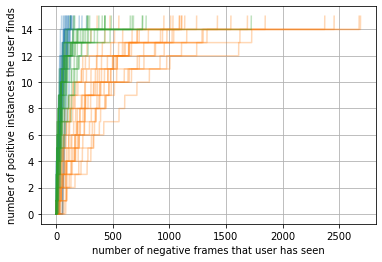

In [8]:
fig, ax = plt.subplots(1)
for plot_data_y in iterative_y_list_only_neg:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:blue', alpha=0.3)

for plot_data_y in random_y_list_only_neg:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:orange', alpha=0.3)

for plot_data_y in random_roi_y_list_only_neg:
    x_values = range(len(plot_data_y))
    ax.plot(x_values, plot_data_y, color='tab:green', alpha=0.3)

ax.set_ylabel('number of positive instances the user finds')
ax.set_xlabel('number of negative frames that user has seen')
# ax.set_xscale('log')
ax.grid()

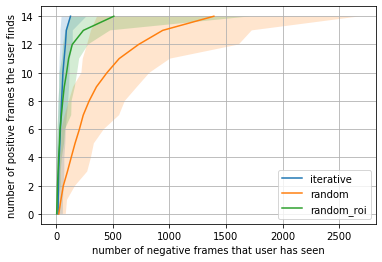

In [23]:
ip_y_only_neg = []
for plot_data_y in iterative_y_list_only_neg:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        while y > current: 
            num_frames_as_y.append(i)
            current += 1
    ip_y_only_neg.append(num_frames_as_y)
ip_y_only_neg = np.asarray(ip_y_only_neg)
ip_y_only_neg_upper = np.max(ip_y_only_neg, axis=0)
ip_y_only_neg_lower = np.min(ip_y_only_neg, axis=0)
ip_y_only_neg_mean = np.mean(ip_y_only_neg, axis=0)
ip_x_only_neg_values = range(ip_y_only_neg.shape[1])

rp_y_only_neg = []
for plot_data_y in random_y_list_only_neg:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        while y > current: 
            num_frames_as_y.append(i)
            current += 1
    rp_y_only_neg.append(num_frames_as_y)
rp_y_only_neg = np.asarray(rp_y_only_neg)
rp_y_only_neg_upper = np.max(rp_y_only_neg, axis=0)
rp_y_only_neg_lower = np.min(rp_y_only_neg, axis=0)
rp_y_only_neg_mean = np.mean(rp_y_only_neg, axis=0)
rp_x_only_neg_values = range(rp_y_only_neg.shape[1])

rp_roi_y_only_neg = []
for plot_data_y in random_roi_y_list_only_neg:
    current = 0
    num_frames_as_y = []
    for i, y in enumerate(plot_data_y): 
        while y > current: 
            num_frames_as_y.append(i)
            current += 1
    rp_roi_y_only_neg.append(num_frames_as_y)
rp_roi_y_only_neg = np.asarray(rp_roi_y_only_neg)
rp_roi_y_only_neg_upper = np.max(rp_roi_y_only_neg, axis=0)
rp_roi_y_only_neg_lower = np.min(rp_roi_y_only_neg, axis=0)
rp_roi_y_only_neg_mean = np.mean(rp_roi_y_only_neg, axis=0)
rp_roi_x_only_neg_values = range(rp_roi_y_only_neg.shape[1])

# plot it!
fig, ax = plt.subplots(1)
ax.plot(ip_y_only_neg_mean, ip_x_only_neg_values, label='iterative', color='tab:blue')
ax.plot(rp_y_only_neg_mean, rp_x_only_neg_values, label='random', color='tab:orange')
ax.plot(rp_roi_y_only_neg_mean, rp_roi_x_only_neg_values, label='random_roi', color='tab:green')
ax.fill_betweenx(ip_x_only_neg_values, ip_y_only_neg_lower, ip_y_only_neg_upper, facecolor='tab:blue', alpha=0.2)
ax.fill_betweenx(rp_x_only_neg_values, rp_y_only_neg_lower, rp_y_only_neg_upper, facecolor='tab:orange', alpha=0.2)
ax.fill_betweenx(rp_roi_x_only_neg_values, rp_roi_y_only_neg_lower, rp_roi_y_only_neg_upper, facecolor='tab:green', alpha=0.2)
ax.legend(loc='lower right')
ax.set_xlabel('number of negative frames that user has seen')
ax.set_ylabel('number of positive frames the user finds')
ax.grid()